In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import json

import imageio
import os

from PIL import Image, ImageDraw
import glob
import sys

sys.path.insert(1, os.path.join(sys.path[0], '../src/'))

from enr.misc.utils import open_runs
from enr.misc.viz import plot_run, make_gif

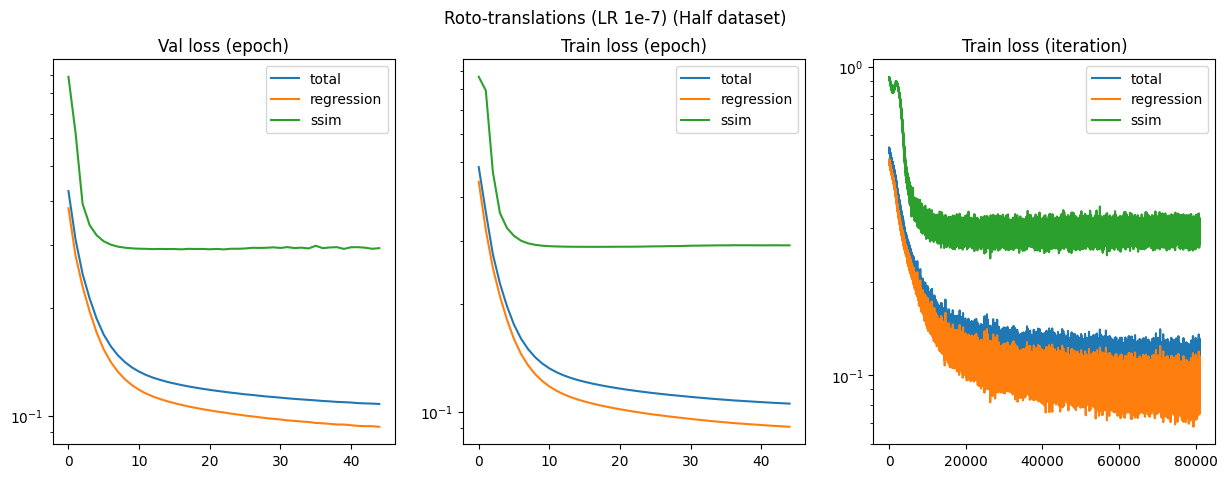

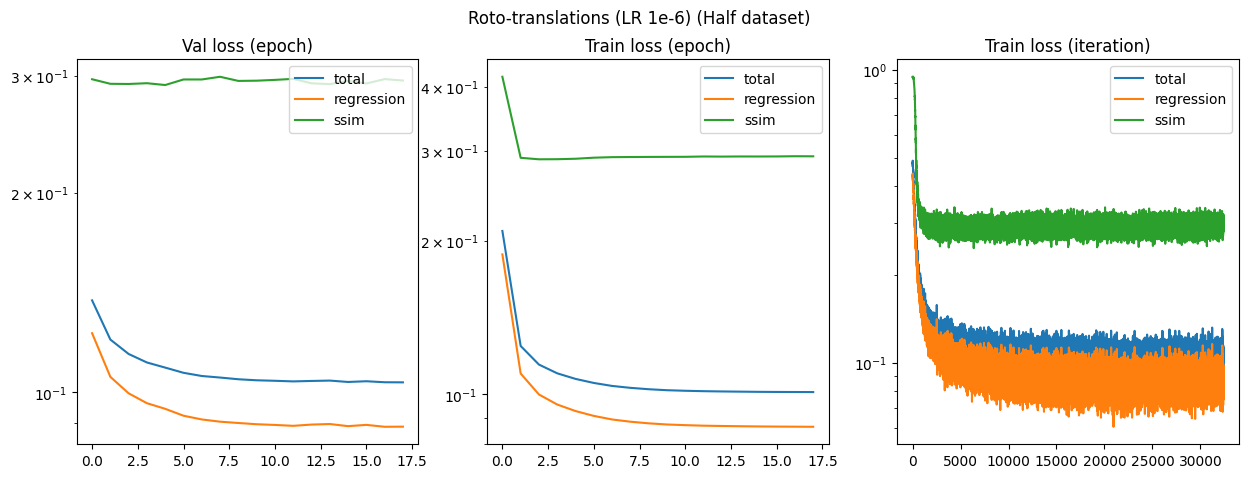

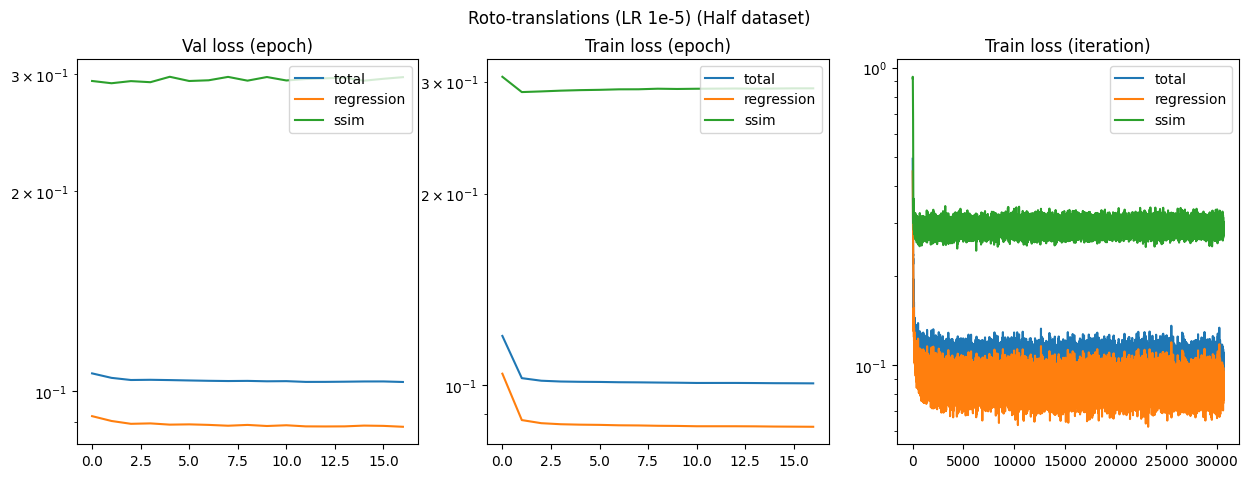

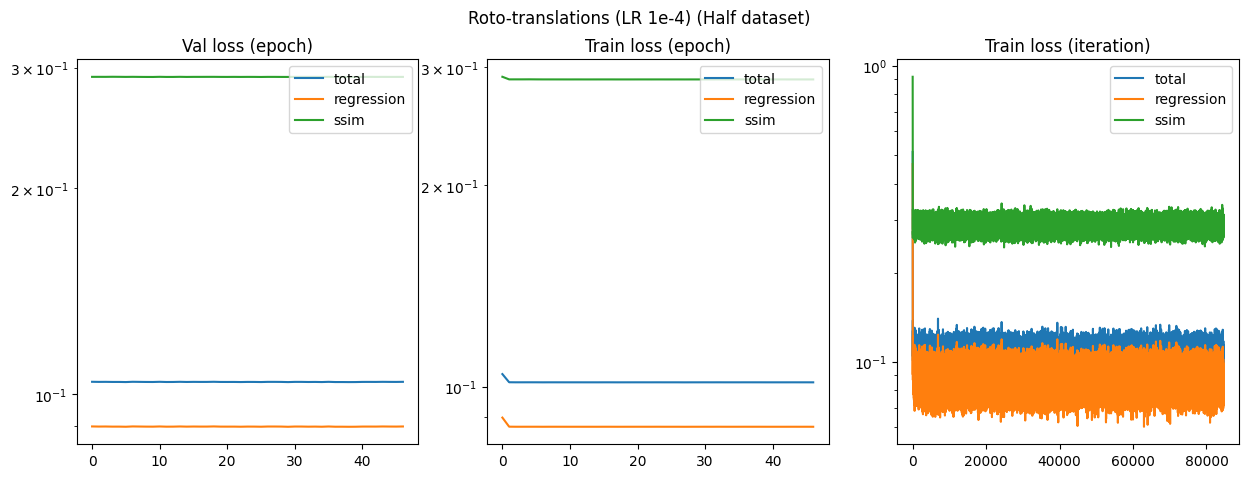

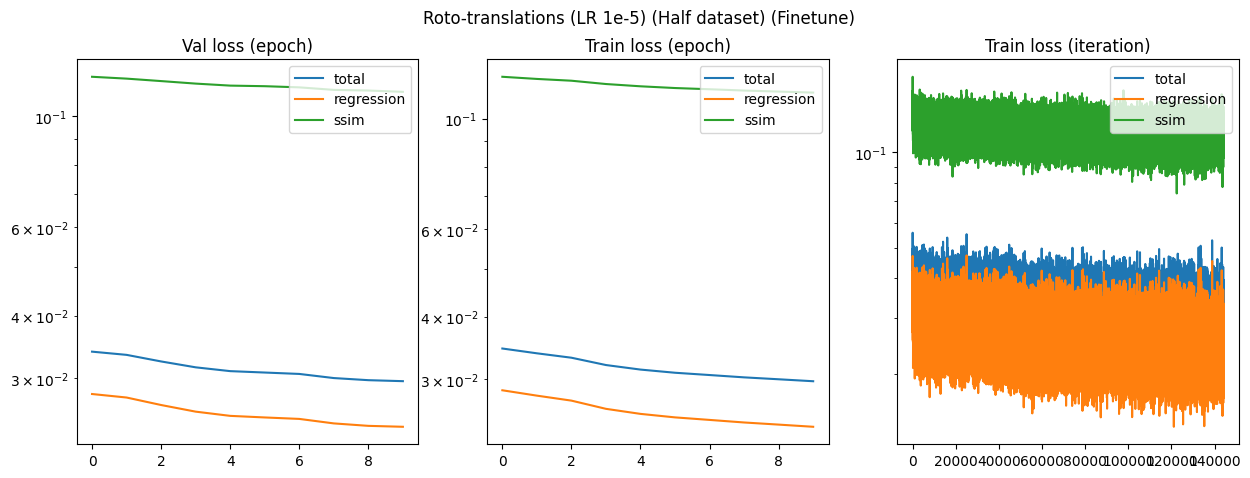

In [2]:
runs = open_runs({
    # '2023-05-10_12-31_roto_lr2e-4' : {'desc' : 'Rotations (LR 2e-4) (Half dataset)'},
    # '2023-05-14_16-54_trans_lr2e-4': {'desc' : 'Translations (LR 2e-4) (Half dataset)'},
    # '2023-05-17_18-25_rototrans_lr2e-4' : {'desc' : 'Roto-translations (LR 2e-4) (Half dataset)'},
    # '2023-05-18_14-23_rototrans_lr1e-7' : {'desc' : 'Roto-translations (LR 1e-7) (Tiny dataset)'},
    # '2023-05-18_13-34_rototrans_lr1e-6' : {'desc' : 'Roto-translations (LR 1e-6) (Tiny dataset)'},
    # '2023-05-18_13-38_rototrans_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Tiny dataset)'},
    # '2023-05-18_13-38_rototrans_lr1e-4' : {'desc' : 'Roto-translations (LR 1e-4) (Tiny dataset)'},
    '2023-05-18_19-35_rototrans_lr1e-7' : {'desc' : 'Roto-translations (LR 1e-7) (Half dataset)'},
    '2023-05-18_15-24_rototrans_lr1e-6' : {'desc' : 'Roto-translations (LR 1e-6) (Half dataset)'},
    '2023-05-18_15-24_rototrans_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Half dataset)'},
    '2023-05-18_19-35_rototrans_lr1e-4' : {'desc' : 'Roto-translations (LR 1e-4) (Half dataset)'},
    '2023-05-19_11-00_roto_finetune_lr1e-5' : {'desc' : 'Roto-translations (LR 1e-5) (Half dataset) (Finetune)'},
})

[plot_run(losses) for losses in runs.values()];
